<a href="https://colab.research.google.com/github/VanLan0/MIS710/blob/main/MIS701_Lec_4_Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lecture 4**

**Introduction to Logistic Regression **
Author: Associate Professor Lemai Nguyen

Objective:
**Cancer Diagnosis**
Predict the diagnosis (healthy or cancerous) based on a biopsy dataset.

**Context**: The dataset was adapted from a biospy dataset. The dataset contains five (5) biological variables and the target variable. 

**Data**: 
V1, V2, V7-V9: biological variables
Diagnosis: healthy or cancerous

**Source**: adapted from a dataset provided by Dr Mark Griffin, Industry Fellow, University of Queensland; https://www.kaggle.com/datasets/ukveteran/biopsy-data-on-breast-cancer-patients 

**Loading Libraries and Functions**

Read about Logistic Regression at:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Train Test Split:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

Classification metrics:
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [ ]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

In [ ]:
# load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation



# **Loading Data**


1.   Load the dataset
2.   Explore the data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url='https://github.com/VanLan0/MIS710/blob/main/biopsy_ln.csv'

In [ ]:
# load dataset
#records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710/biopsy_ln.csv")
records = pd.read_csv(url, index_col=0)
#explore the dataset
print(records)

         V1  V2  V7  V8  V9 diagnosis
ID                                   
1177399   8   3   1   6   2   healthy
1246562  10   2   1   1   2   healthy
1108370   9   5   2   1   5   healthy
1165926   9   6   2   9  10   healthy
1167439   2   3   2   5   1   healthy
...      ..  ..  ..  ..  ..       ...
1124651   1   3   7   2   1   healthy
1137156   2   2   7   1   1   healthy
1147044   3   1   7   1   1   healthy
1213375   8   4   7   8   2   healthy
721482    4   4   7   3   1   healthy

[699 rows x 6 columns]


In [ ]:
print(records[50:70])

In [ ]:
records.info(10)

In [ ]:
#Inspect missing data


ID           0
V1           0
V2           0
V7           0
V8           0
V9           0
diagnosis    0
dtype: int64


In [ ]:
print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1]) 

records.describe()

In [ ]:
#records=records.drop(['ID'], axis=1)
records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1177399 to 721482
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   V1         699 non-null    int64 
 1   V2         699 non-null    int64 
 2   V7         699 non-null    int64 
 3   V8         699 non-null    int64 
 4   V9         699 non-null    int64 
 5   diagnosis  699 non-null    object
dtypes: int64(5), object(1)
memory usage: 38.2+ KB


#Do NOT do if you have done the previous code!
ALTERNATIVE way to remove ID: 

In [ ]:
#Do NOT do if you have done the previous code!
#ALTERNATIVE way to remove ID: 
records = records.iloc[:,1:]
records.head()

,V1,V2,V7,V8,V9,class
0,8,3,1,6,2,healthy
1,10,2,1,1,2,healthy
2,9,5,2,1,5,healthy
3,9,6,2,9,10,healthy
4,2,3,2,5,1,healthy


# **Visually Exploring Data**
1. Explore histograms of continuous variables
2. Generate barcharts of categorical variables
3. Convert data as needed
3. Explore relationships among the variables using heatmaps
4. Explore logistric regression relationships between variables 

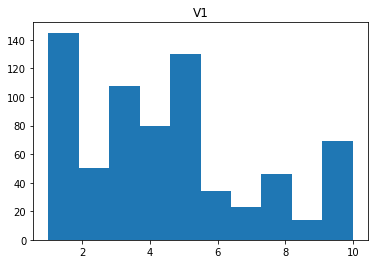

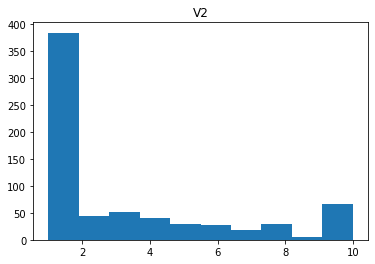

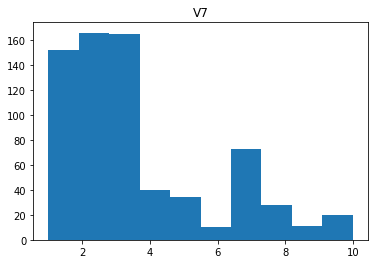

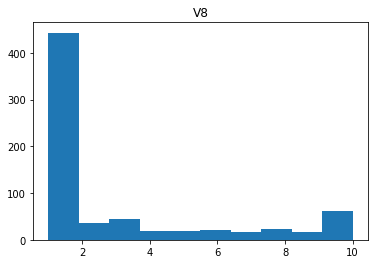

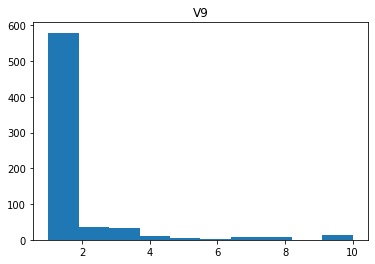

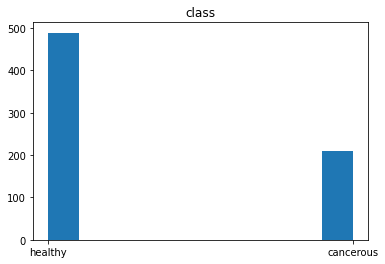

In [ ]:
#create histograms
for i in records.iloc[:,:]: 
    plt.hist(records[i])
    plt.title(i)
    plt.show()

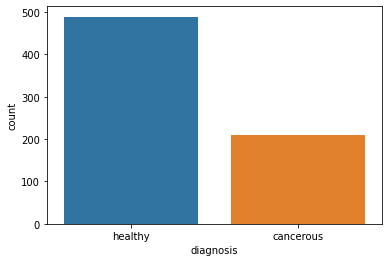

In [ ]:
from pandas.io.parsers.readers import annotations
    #create barchats
plot=sns.countplot(data=records, x='diagnosis')
plt.show()

In [ ]:
records['diagnosis'].describe()

count         699
unique          2
top       healthy
freq          489
Name: diagnosis, dtype: object

**Do it yourself: examine vairables**

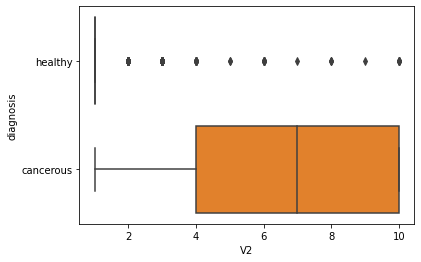

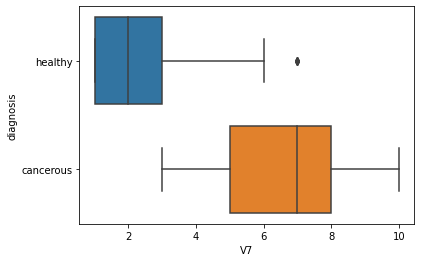

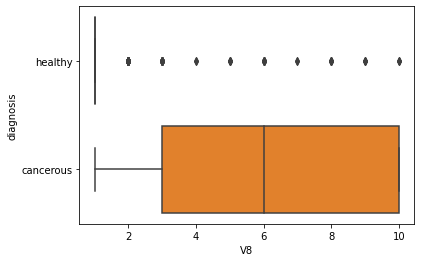

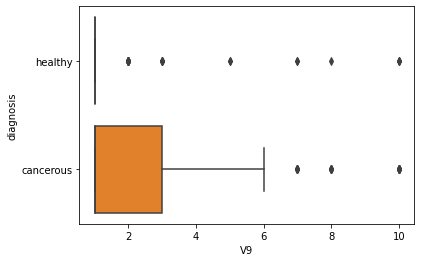

In [ ]:
for i in records.columns[1:5]:
  sns.boxplot(data=records, x=i, y='diagnosis')
  plt.show()

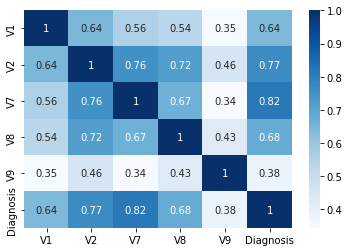

In [ ]:
sns.heatmap(data=records.corr(), cmap="Blues", annot=True)

# **Define your own function and call it**

In [ ]:
#convert categorical data to numerical 
def coding_diagnosis(x):
        if x=='cancerous': return 1
        if x=='healthy': return 0
       
records['Diagnosis'] = records['diagnosis'].apply(coding_diagnosis)

print(records.sample(10))

         V1  V2  V7  V8  V9  diagnosis  Diagnosis
ID                                               
1036172   2   1   2   1   1    healthy          0
1352848   3  10   7   4   1  cancerous          1
709287    6   8   8   9   1  cancerous          1
1031608   2   1   2   1   1    healthy          0
1174428   5   3   5   3   1  cancerous          1
1201834   2   1   3   1   1    healthy          0
1148278   3   3   4   4   1  cancerous          1
1297522   2   1   1   1   1    healthy          0
1212251   1   1   3   1   1    healthy          0
1198128  10   8   3   1  10    healthy          0


In [ ]:
#Convert categorical variables to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
records['Diagnosis'] = encoder.fit_transform(records['diagnosis'])
print(records.sample(10))

          ID  V1  V2  V7  V8  V9  diagnosis  Diagnosis
50   1115282   5   3   4  10   1  cancerous          0
251  1184184   1   1   1   1   1    healthy          1
157   832567   4   2   7   6   1  cancerous          0
472  1272039   1   1   2   1   1    healthy          1
568  1143978   5   2   3   1   1    healthy          1
488  1299924   5   1   2   1   1    healthy          1
222  1222047  10  10  10   6   1  cancerous          0
496  1135090   4   1   2   1   1    healthy          1
687  1171795   1   3   5   3   2    healthy          1
551  1002945   5   4   3   2   1    healthy          1


Compare the above two techniques

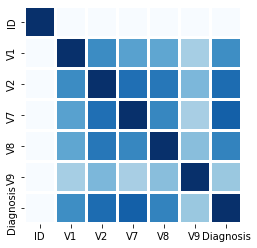

In [ ]:
#generate heatmaps to explore relationships
sns.heatmap(records.corr(), cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

What can you observe in the heatmap?

**Explore relationships between biomarkers and diagnosis**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


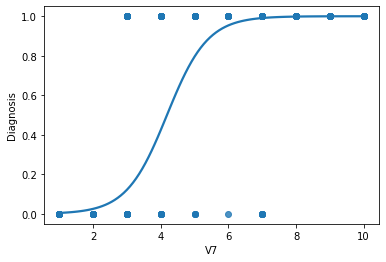

In [ ]:
sns.regplot(x=records['V7'], y=records['Diagnosis'], logistic=True, ci=None)

**Feature Selection**

Select predictors (attributes) for Classification
Set role (Target)

In [ ]:
#Selecting predictors
features =['V1', 'V2', 'V7', 'V8', 'V9'] #you can select a range of columns features = records.columns[0:5]

#complete the code below
X= records[features]
y= records['Diagnosis']  # Target variable


# **Split the Dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% training and 20% testing 

#inspect the split datasets

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(559, 5)
(559,)
(140, 5)
(140,)


# **Training a Logistic Regression Model**

1.   Train a model using the training dataset
2.   Make prediction using the model for the test dataset

Read about Logistic Regression Classifier at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html




In [ ]:
# Create Logitic Regression classifer object

#Create an initial Logistic Regression model
logreg = LogisticRegression(max_iter=100)

# Complete the code to train Logistic Regression Classifer with the traning dataset 
logreg = logreg.fit(X_train, y_train)

#Complete the code to make predictions for the test dataset
y_pred = logreg.predict(X_test)


In [ ]:
#get predicted probabilities for the main class
y_pred_probs = logreg.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]
print(y_pred_probs)

<AxesSubplot:>

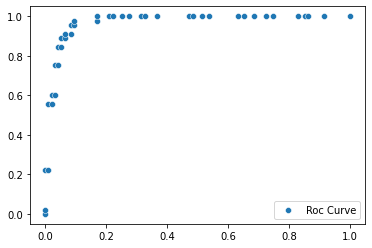

In [ ]:
#get fpr and tpr and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_pred_probs)

sns.scatterplot(x=lr_fpr, y=lr_tpr, label='Roc Curve')

<AxesSubplot:>

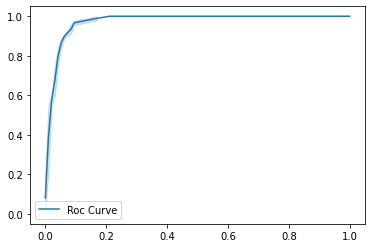

In [ ]:
sns.lineplot(x=lr_fpr, y=lr_tpr, label='Roc Curve')

In [ ]:
roc_points=pd.DataFrame({'FPR':lr_fpr, 'TPR':lr_tpr, 'Thresholds': thresholds})
print(roc_points.round(3))

In [ ]:
# create an array of candidate thresholds
thresholds2 = np.linspace(0, 1, 101)

# initialize variables to store the best threshold and the highest AUC score
best_threshold = None
highest_auc_score = -1

# iterate over the thresholds and compute the AUC score for each
for threshold in thresholds2:
    y_pred_test = (y_pred_probs >= threshold).astype(int)
    auc_score = roc_auc_score(y_test, y_pred_test)
    if auc_score > highest_auc_score:
        highest_auc_score = auc_score
        best_threshold = threshold

# print the best threshold and the highest AUC score on the test data
print('Best threshold:', best_threshold)
print('Highest AUC score:', highest_auc_score)

Best threshold on training data: 0.16
Highest AUC score on training data: 0.9415204678362574


Best threshold: 0.2


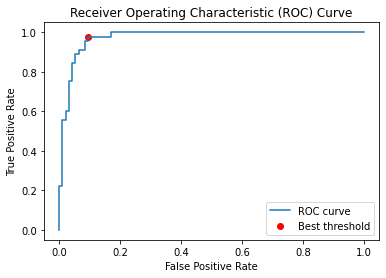

In [ ]:
# compute the fpr, tpr, and thresholds for the ROC curve on the training data
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# find the index of the best threshold in the thresholds array
best_index = np.argmax(lr_tpr - lr_fpr)
print('Best threshold:', thresholds[best_index].round(1))

# plot the ROC curve and the best point
plt.plot(lr_fpr, lr_tpr, label='ROC curve')
plt.scatter(lr_fpr[best_index], lr_tpr[best_index], marker='o', color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Inspect Predictions**

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head(20)

# **Model Evaluation**



1.   Calculate Accuracy, Precision, Recall, F1


Classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics







In [ ]:
#import evaluation functions
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix

#Model Evaluation, calculate metrics: Accuracy, Precision, Recall, F1,
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

Accuracy:  0.9142857142857143
Precision:  0.8837209302325582
Recall:  0.8444444444444444
F1:  0.8636363636363636


Interpret the above

In [ ]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90  5]
 [ 7 38]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        95
           1       0.88      0.84      0.86        45

    accuracy                           0.91       140
   macro avg       0.91      0.90      0.90       140
weighted avg       0.91      0.91      0.91       140



**Plot ROC (Receiver operating characteristic) curve and confusion matrix**

ROC surve
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=plot_roc_curve#sklearn.metrics.plot_roc_curve

Confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

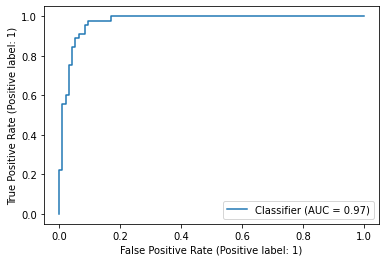

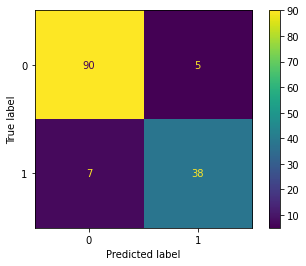

In [ ]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

#RocCurveDisplay.from_estimator(logreg,X_test, y_test)
RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

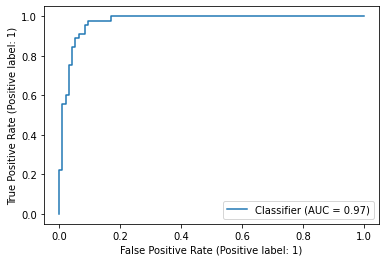

In [ ]:
#ROC for the probabilities of y_pred
RocCurveDisplay.from_predictions(y_test, y_pred_probs)

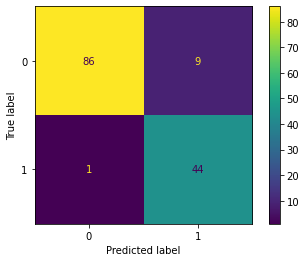

In [ ]:
#Confusion Matrix for a new probability
y_pred_best = (y_pred_probs >= thresholds[best_index]).astype(int)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)

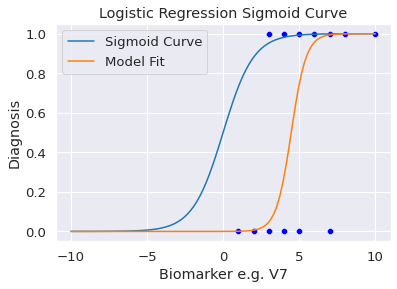

In [ ]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a sequence of points along the x axis
x_vals = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the model coefficients
coef = logreg.coef_.flatten()
intercept = logreg.intercept_
y_vals = sigmoid(np.dot(X_test, coef) + intercept)

# Plot the sigmoid curve using seaborn
sns.lineplot(x=x_vals, y=sigmoid(x_vals), label='Sigmoid Curve')
sns.lineplot(x=x_vals, y=sigmoid(np.dot(np.column_stack(([x_vals]*5)), coef) + intercept), label='Model Fit')
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.2)
sns.scatterplot(x=X_test['V7'], y=y_test, color='blue')
plt.xlabel('Biomarker e.g. V7')
plt.ylabel('Diagnosis')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.show()

In [ ]:
print(coef[0])

0.3398365008600734


In [ ]:
print('Diagnosis= ', '%.3f' % intercept, '+', '%.3f' %coef[0], '*V1', '+', '%.3f' %coef[1], '*V2', '+', '%.3f' %coef[2], '*V7', '+', '%.3f' %coef[3], '*V8', '+', '%.3f' %coef[4], '*V9')

Diagnosis=  -9.123 + 0.340 *V1 + 0.116 *V2 + 1.316 *V7 + 0.221 *V8 + 0.045 *V9
